In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
data_path = "/content/drive/MyDrive/Strava Csv"

In [3]:
dailyActivity_merged = pd.read_csv("/content/drive/MyDrive/Strava Csv/dailyActivity_merged.csv")
dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
dailyActivity_merged['ActivityDate'] = pd.to_datetime(dailyActivity_merged['ActivityDate'])
#Any Duplicates
dailyActivity_merged.duplicated().sum()
#Any Null values
dailyActivity_merged.isnull().sum()


,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0


In [6]:
#To Avoid Multiple Entries per day
dailyActivity_merged = dailyActivity_merged.groupby('ActivityDate')['TotalSteps'].sum().reset_index()

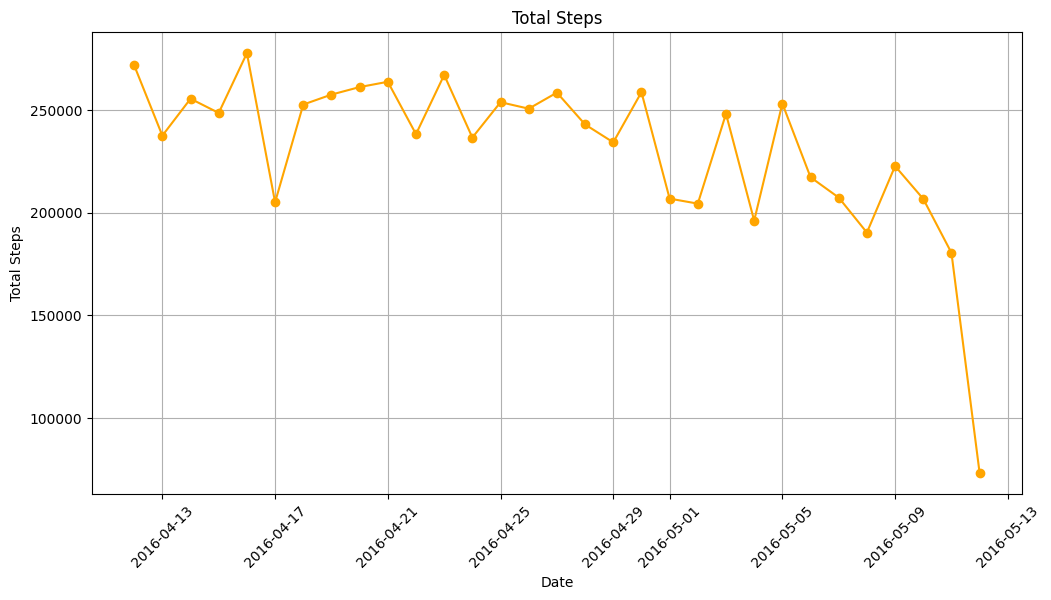

In [7]:
#Total steps Summary
dailyActivity_merged['TotalSteps'].describe()
#Plotting the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(dailyActivity_merged['ActivityDate'], dailyActivity_merged['TotalSteps'], marker='o',color='Orange')
plt.title('Total Steps')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




In [8]:
dailyCalories_merged = pd.read_csv("/content/drive/MyDrive/Strava Csv/dailyCalories_merged.csv")
dailyCalories_merged.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [9]:
dailyCalories_merged['ActivtiyDay'] = pd.to_datetime(dailyCalories_merged['ActivityDay'])
#Any Duplicates
dailyCalories_merged.duplicated().sum()
#Any Null Values
dailyCalories_merged.isnull().sum()


,0
Id,0
ActivityDay,0
Calories,0
ActivtiyDay,0


In [11]:
#To Avoid Multiple Entries per day
dailyCalories_merged = dailyCalories_merged.groupby('ActivityDay')['Calories'].sum().reset_index()


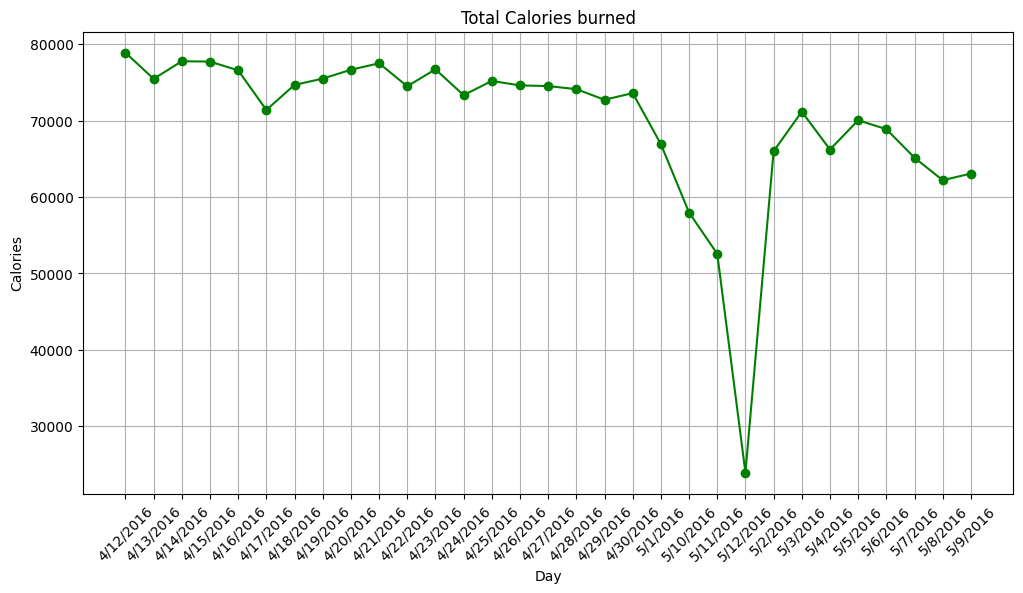

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(dailyCalories_merged['ActivityDay'], dailyCalories_merged['Calories'], marker='o',color='Green')
plt.title('Total Calories burned')
plt.xlabel('Day')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
dailySteps_merged = pd.read_csv(os.path.join("/content/drive/MyDrive/Strava Csv" ,"dailySteps_merged.csv"))
sleepDay_merged = pd.read_csv(os.path.join("/content/drive/MyDrive/Strava Csv", "sleepDay_merged.csv"))
weightLogInfo_merged = pd.read_csv(os.path.join("/content/drive/MyDrive/Strava Csv", "weightLogInfo_merged.csv"))

# Convert date columns to datetime
dailySteps_merged['ActivityDay'] = pd.to_datetime(dailySteps_merged['ActivityDay'])
sleepDay_merged['SleepDay'] = pd.to_datetime(sleepDay_merged['SleepDay'])
weightLogInfo_merged['Date'] = pd.to_datetime(weightLogInfo_merged['Date'])

/tmp/ipython-input-87205349.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleepDay_merged['SleepDay'] = pd.to_datetime(sleepDay_merged['SleepDay'])
/tmp/ipython-input-87205349.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weightLogInfo_merged['Date'] = pd.to_datetime(weightLogInfo_merged['Date'])


In [23]:
# Fix column names first
dailySteps_merged.rename(columns={'ActivityDay': 'ActivityDate'}, inplace=True)
sleepDay_merged.rename(columns={'SleepDay': 'ActivityDate'}, inplace=True)
weightLogInfo_merged.rename(columns={'Date': 'ActivityDate'}, inplace=True)

# Now safely select only the columns we need
dailySteps_merged = dailySteps_merged[['ActivityDate', 'StepTotal']]
sleepDay_merged = sleepDay_merged[['ActivityDate', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]
weightLogInfo_merged = weightLogInfo_merged[['ActivityDate', 'WeightKg']]


In [17]:
print(dailySteps_merged.columns)
print(sleepDay_merged.columns)
print(weightLogInfo_merged.columns)


Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')
Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')


In [24]:
# Ensure ActivityDate is datetime in both DataFrames
dailyActivity_merged['ActivityDate'] = pd.to_datetime(dailyActivity_merged['ActivityDate'])
dailyCalories_merged['ActivityDay'] = pd.to_datetime(dailyCalories_merged['ActivityDay'])

# Start with the first merge
daily_summary = dailyActivity_merged.merge(
    dailyCalories_merged.rename(columns={'ActivityDay':'ActivityDate'}),
    on='ActivityDate', how='left'
)

# Prepare the other CSVs: only keep ActivityDate + metric columns
dailySteps_merged = dailySteps_merged[['ActivityDate', 'StepTotal']]
sleepDay_merged = sleepDay_merged[['ActivityDate', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]
weightLogInfo_merged = weightLogInfo_merged[['ActivityDate', 'WeightKg']]

# Convert date columns to datetime
for df in [daily_summary, dailySteps_merged, sleepDay_merged, weightLogInfo_merged]:
    df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Merge the rest
daily_summary = daily_summary.merge(dailySteps_merged, on='ActivityDate', how='left')
daily_summary = daily_summary.merge(sleepDay_merged, on='ActivityDate', how='left')
daily_summary = daily_summary.merge(weightLogInfo_merged, on='ActivityDate', how='left')

# Save merged daily summary
daily_summary.to_csv(os.path.join("/content/drive/MyDrive/Strava Csv", "daily_summary.csv"), index=False)
print("Daily summary created with all daily CSVs")


Daily summary created with all daily CSVs


In [25]:
daily_summary.head()       # First 5 rows
daily_summary.shape        # Number of rows and columns
daily_summary.columns      # All column names


Index(['ActivityDate', 'TotalSteps', 'Calories', 'StepTotal',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'WeightKg'],
      dtype='object')

In [29]:
print(daily_summary.columns.tolist())


['ActivityDate', 'TotalSteps', 'Calories', 'StepTotal', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg']


In [28]:
# Rename StepTotal → TotalSteps (don't have two columns)
daily_summary_clean = daily_summary.rename(columns={'StepTotal': 'TotalSteps'})

# Drop duplicate if both TotalSteps exist
if 'TotalSteps' in daily_summary_clean.columns and 'StepTotal' in daily_summary_clean.columns:
    daily_summary_clean = daily_summary_clean.drop(columns=['StepTotal'])

# Select only the available relevant columns
daily_summary_clean = daily_summary_clean[[
    'ActivityDate',
    'TotalSteps',
    'Calories',
    'TotalSleepRecords',
    'TotalMinutesAsleep',
    'TotalTimeInBed',
    'WeightKg'
]]

# Save cleaned CSV
daily_summary_clean.to_csv("/content/drive/MyDrive/Strava Csv/daily_summary_clean.csv", index=False)
print("Cleaned daily summary saved")


Cleaned daily summary saved


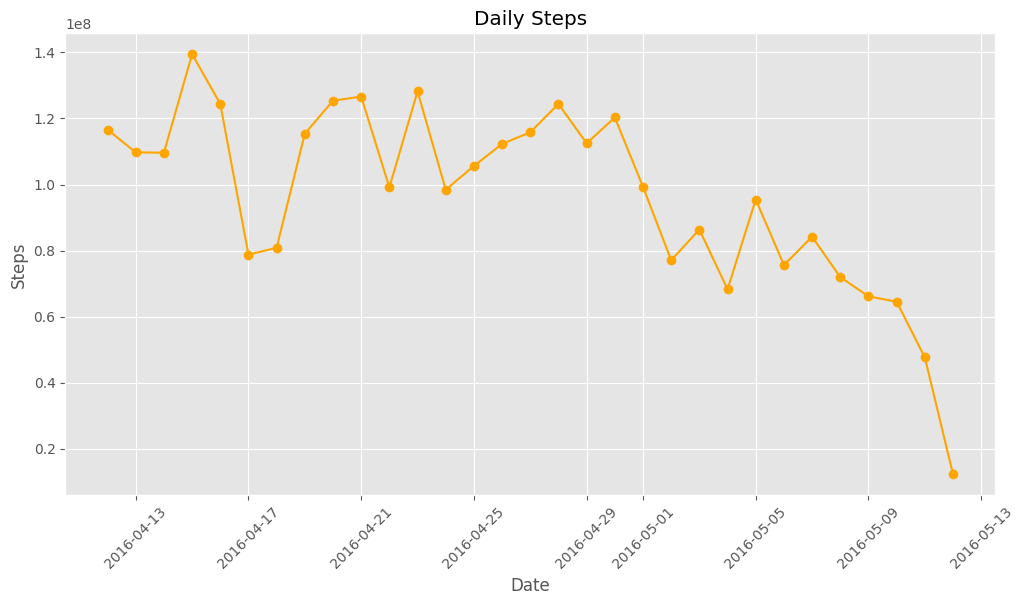

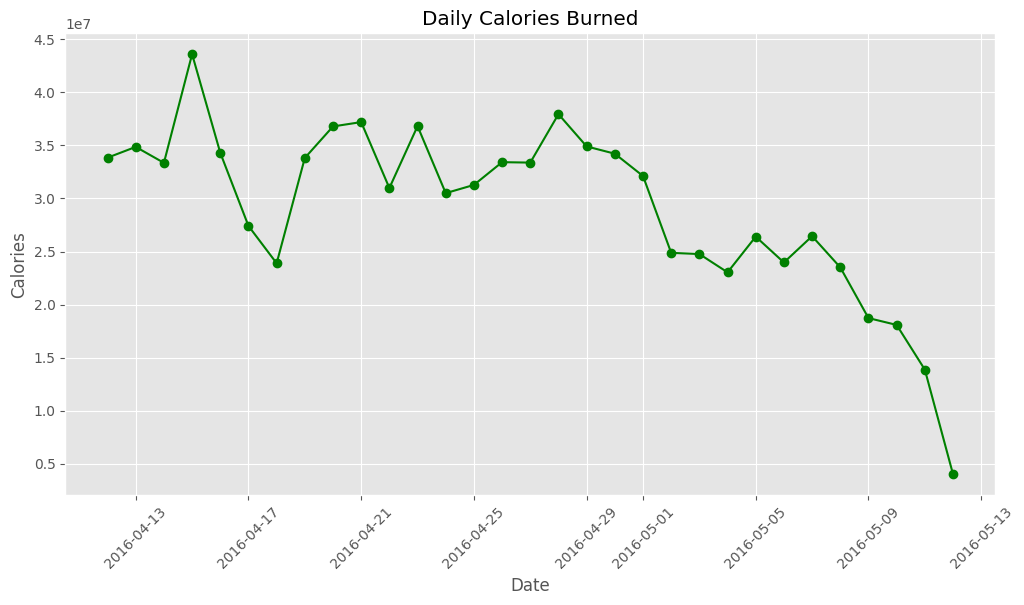

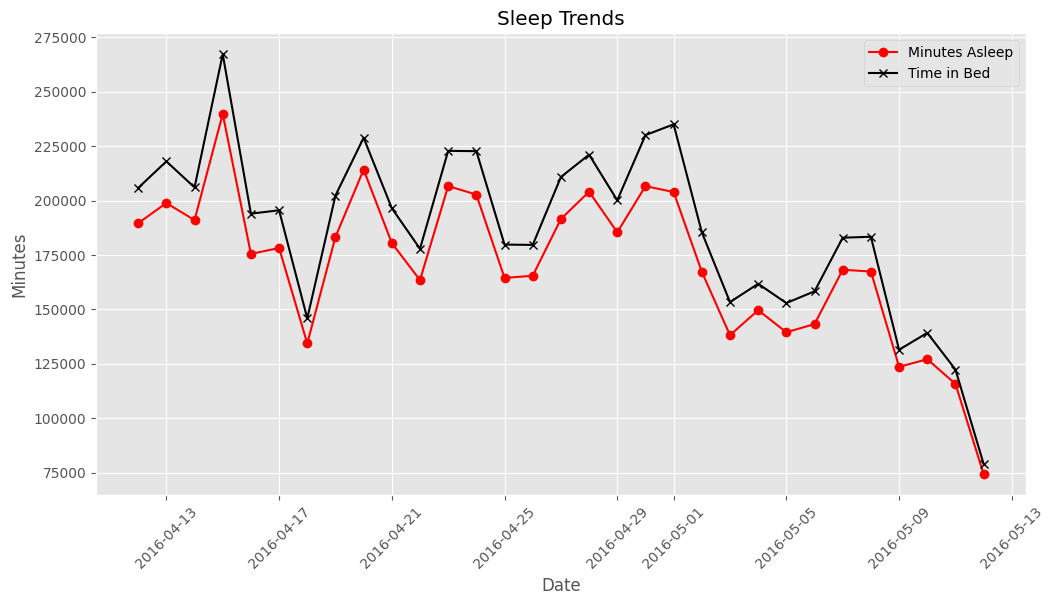

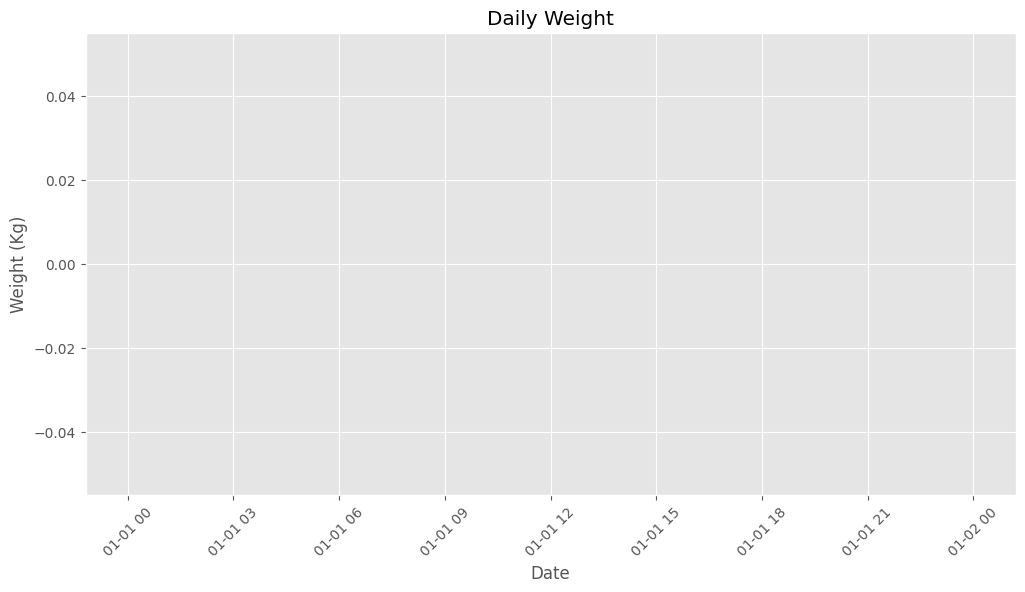

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned CSV
data_path = "/content/drive/MyDrive/Strava Csv/daily_summary_clean.csv"
daily_summary = pd.read_csv("/content/drive/MyDrive/Strava Csv/daily_summary_clean.csv")
daily_summary['ActivityDate'] = pd.to_datetime(daily_summary['ActivityDate'])

# Aggregate per day to avoid duplicates
daily_plot = daily_summary.groupby('ActivityDate').agg({
    'TotalSteps':'sum',
    'Calories':'sum',
    'TotalMinutesAsleep':'sum',
    'TotalTimeInBed':'sum',
    'WeightKg':'mean'
}).reset_index()

# Optional: sort by date
daily_plot = daily_plot.sort_values('ActivityDate')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,6)

# Steps
plt.figure()
plt.plot(daily_plot['ActivityDate'], daily_plot['TotalSteps'], marker='o', color='Orange')
plt.title('Daily Steps')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calories
plt.figure()
plt.plot(daily_plot['ActivityDate'], daily_plot['Calories'], marker='o', color='green')
plt.title('Daily Calories Burned')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Sleep
plt.figure()
plt.plot(daily_plot['ActivityDate'], daily_plot['TotalMinutesAsleep'], marker='o', color='Red', label='Minutes Asleep')
plt.plot(daily_plot['ActivityDate'], daily_plot['TotalTimeInBed'], marker='x', color='Black', label='Time in Bed')
plt.title('Sleep Trends')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Weight
plt.figure()
plt.plot(daily_plot['ActivityDate'], daily_plot['WeightKg'], marker='o', color='pink')
plt.title('Daily Weight')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





In [32]:
# Interpolate missing weights
daily_plot['WeightKg'] = daily_plot['WeightKg'].interpolate(method='linear')

# Verify
print(daily_plot[['ActivityDate', 'WeightKg']].head(20))

   ActivityDate  WeightKg
0    2016-04-12       NaN
1    2016-04-13       NaN
2    2016-04-14       NaN
3    2016-04-15       NaN
4    2016-04-16       NaN
5    2016-04-17       NaN
6    2016-04-18       NaN
7    2016-04-19       NaN
8    2016-04-20       NaN
9    2016-04-21       NaN
10   2016-04-22       NaN
11   2016-04-23       NaN
12   2016-04-24       NaN
13   2016-04-25       NaN
14   2016-04-26       NaN
15   2016-04-27       NaN
16   2016-04-28       NaN
17   2016-04-29       NaN
18   2016-04-30       NaN
19   2016-05-01       NaN


/tmp/ipython-input-35616165.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourlySteps_merged['ActivityHour'] = pd.to_datetime(hourlySteps_merged['ActivityHour'])


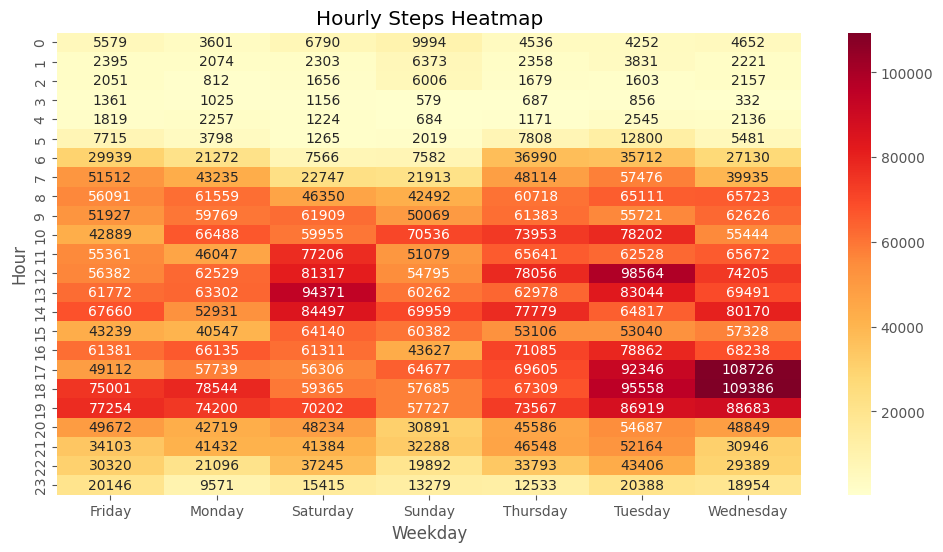

In [33]:
#hourly steps Heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hourlySteps_merged = pd.read_csv("/content/drive/MyDrive/Strava Csv/hourlySteps_merged.csv")
hourlySteps_merged['ActivityHour'] = pd.to_datetime(hourlySteps_merged['ActivityHour'])
hourlySteps_merged['Weekday'] = hourlySteps_merged['ActivityHour'].dt.day_name()
hourlySteps_merged['Hour'] = hourlySteps_merged['ActivityHour'].dt.hour

# Pivot table: Hour vs Weekday
heat_data = hourlySteps_merged.pivot_table(index='Hour', columns='Weekday', values='StepTotal', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(heat_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Hourly Steps Heatmap")
plt.show()


/tmp/ipython-input-2466270196.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_cal['ActivityHour'] = pd.to_datetime(hourly_cal['ActivityHour'])


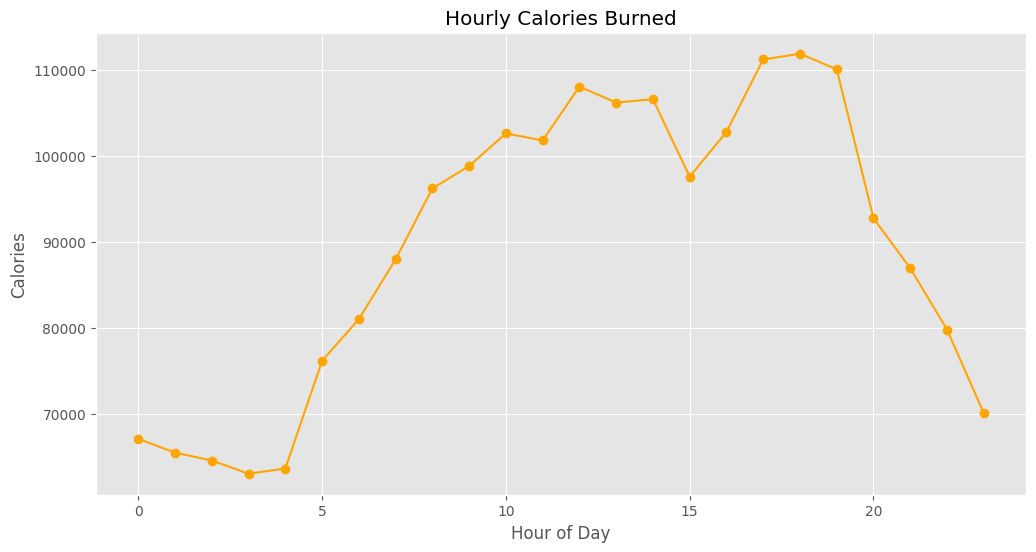

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load hourly calories file
hourly_cal = pd.read_csv("/content/drive/MyDrive/Strava Csv/hourlyCalories_merged.csv")

# Convert to datetime if needed
hourly_cal['ActivityHour'] = pd.to_datetime(hourly_cal['ActivityHour'])
hourly_cal['Hour'] = hourly_cal['ActivityHour'].dt.hour

# Aggregate across days: total calories per hour
calories_by_hour = hourly_cal.groupby('Hour')['Calories'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(calories_by_hour['Hour'], calories_by_hour['Calories'], marker='o', color='orange')
plt.title("Hourly Calories Burned")
plt.xlabel("Hour of Day")
plt.ylabel("Calories")
plt.grid(True)
plt.show()


/tmp/ipython-input-2016531832.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minute_steps['ActivityMinute'] = pd.to_datetime(minute_steps['ActivityMinute'])


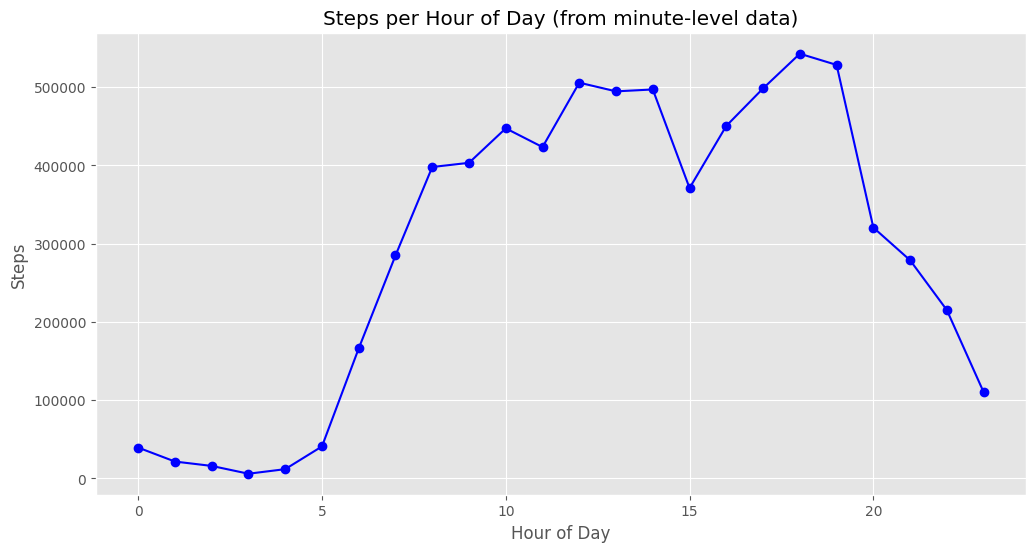

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load minute steps file
minute_steps = pd.read_csv("/content/drive/MyDrive/Strava Csv/minuteStepsNarrow_merged.csv")

# Convert to datetime
minute_steps['ActivityMinute'] = pd.to_datetime(minute_steps['ActivityMinute'])
minute_steps['Hour'] = minute_steps['ActivityMinute'].dt.hour

# Aggregate steps per hour (across all days)
hourly_steps = minute_steps.groupby('Hour')['Steps'].sum().reset_index()

# Plot hourly pattern
plt.figure(figsize=(12,6))
plt.plot(hourly_steps['Hour'], hourly_steps['Steps'], marker='o', color='blue')
plt.title("Steps per Hour of Day (from minute-level data)")
plt.xlabel("Hour of Day")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


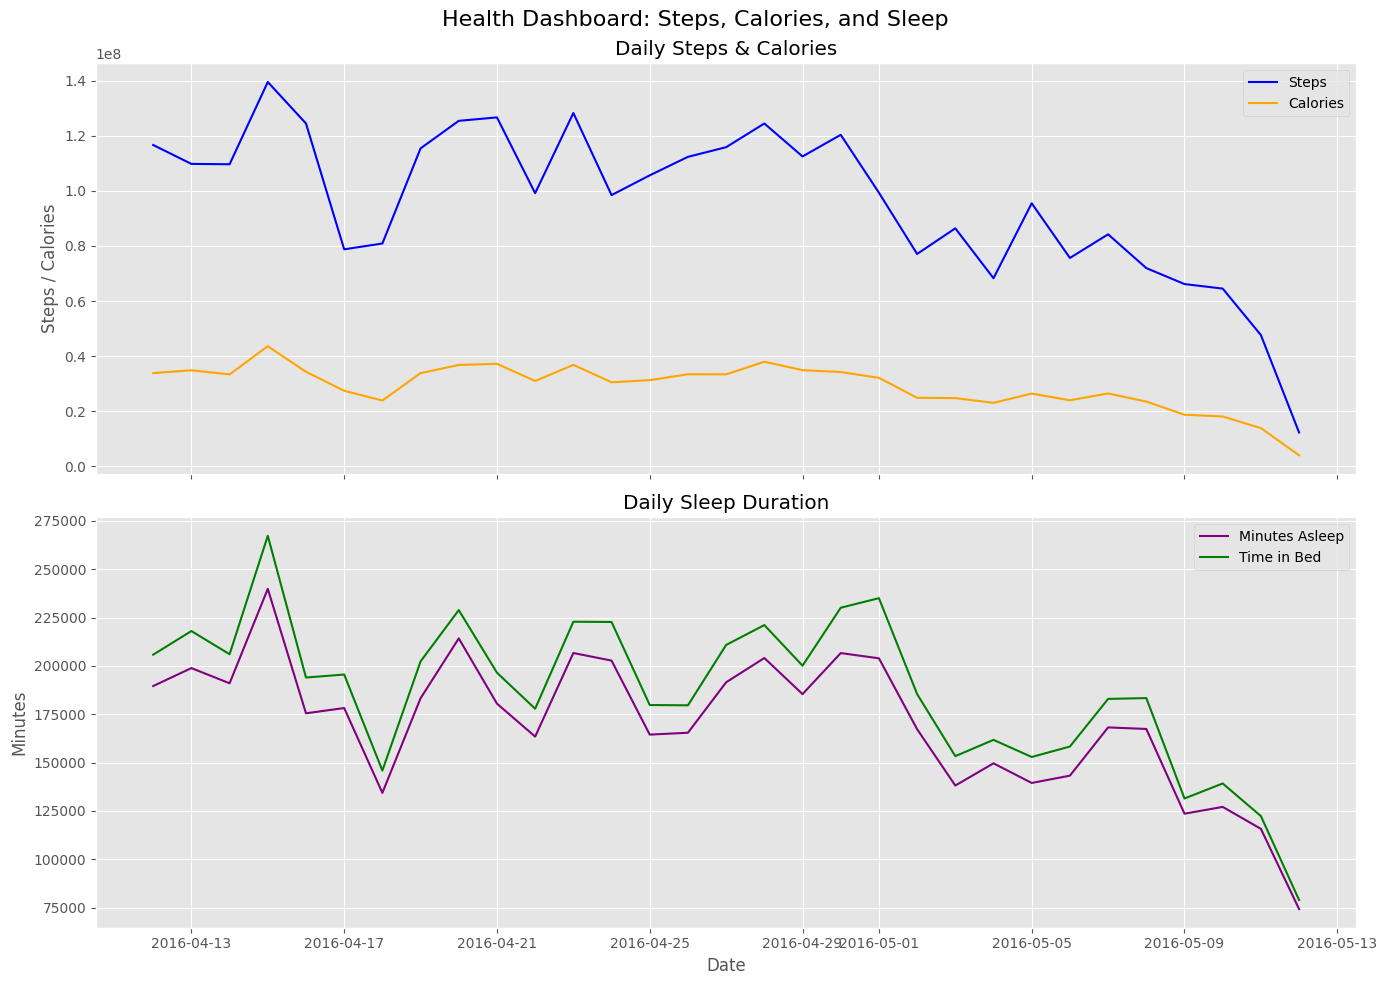

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(14,10), sharex=True)

# 1. Steps & Calories
axes[0].plot(daily_plot['ActivityDate'], daily_plot['TotalSteps'], label="Steps", color="blue")
axes[0].plot(daily_plot['ActivityDate'], daily_plot['Calories'], label="Calories", color="orange")
axes[0].set_ylabel("Steps / Calories")
axes[0].legend()
axes[0].set_title("Daily Steps & Calories")

# 2. Sleep
axes[1].plot(daily_plot['ActivityDate'], daily_plot['TotalMinutesAsleep'], label="Minutes Asleep", color="purple")
axes[1].plot(daily_plot['ActivityDate'], daily_plot['TotalTimeInBed'], label="Time in Bed", color="green")
axes[1].set_ylabel("Minutes")
axes[1].legend()
axes[1].set_title("Daily Sleep Duration")

plt.xlabel("Date")
plt.suptitle("Health Dashboard: Steps, Calories, and Sleep", fontsize=16)
plt.tight_layout()
plt.show()


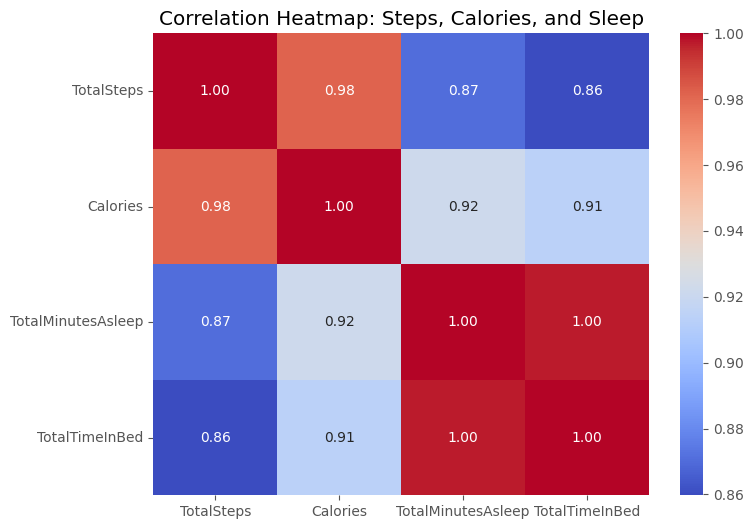

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant columns
corr_data = daily_plot[['TotalSteps', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed']]

# Compute correlation and plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Steps, Calories, and Sleep")
plt.show()


#Project Summary

For this project, I explored 8 Fitbit/Strava datasets that track activity, calories, sleep, and weight. Instead of trying to use every file available, I focused only on the ones that gave meaningful insights about daily habits and health patterns.

#Data Used

dailyActivity_merged.csv → overall daily stats (steps, calories, distance, active minutes)

dailyCalories_merged.csv → calories burned per day

dailySteps_merged.csv → daily step counts

sleepDay_merged.csv → total minutes asleep and time in bed

weightLogInfo_merged.csv → logged weight information

hourlySteps_merged.csv → steps recorded each hour

hourlyCalories_merged.csv → calories burned each hour

minuteStepsNarrow_merged.csv → fine-grained minute-by-minute step data

#What I Analyzed

Daily trends → visualized steps, calories, and sleep over time.

Hourly patterns → identified which times of day had the most steps and calorie burn.

Minute-level activity → spotted bursts of movement in the minute-by-minute step data.

Sleep analysis → compared minutes asleep vs total time in bed.

Weight logs → explored weight entries to connect activity with body metrics.

Combined dashboard → pulled together steps, calories, and sleep into one visualization.

Correlation heatmap → studied relationships between activity, calories, and sleep.

#Key Takeaways

Steps and calories are strongly linked — higher step counts almost always mean more calories burned.

Activity varies by time of day — certain hours consistently show peaks in steps and calorie burn.

Sleep quality isn’t just about time in bed — actual minutes asleep can be noticeably lower.

Weight logs provide context but are less frequent compared to steps or calories.

#Conclusion

By analyzing just 8 core CSV files, I was able to build a clear picture of my daily activity, energy use, and sleep habits. The project shows how a mix of daily, hourly, and minute-level data can be combined to create meaningful insights. Even without using all 18 files, this smaller set was more than enough to create a complete and balanced analysis.